In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'drive' from 'vscode' (unknown location)

In [62]:
import os
dataset_folder = '/content/drive/My Drive/FYP DATAETS'
csv_file = 'coin_Bitcoin.csv'
file_address = os.path.join(dataset_folder, csv_file)
print(file_address)

/content/drive/My Drive/FYP DATAETS/coin_Bitcoin.csv


In [63]:
bitcoin_data = pd.read_csv(file_address, header=[0, 1])
bitcoin_data.head()

,Price,Close,High,Low,Open,Volume
,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,Date,NaN,NaN,NaN,NaN,NaN
1,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800.0
2,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200.0
3,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700.0
4,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600.0


In [64]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Price, Ticker)    4095 non-null   object 
 1   (Close, BTC-USD)   4094 non-null   float64
 2   (High, BTC-USD)    4094 non-null   float64
 3   (Low, BTC-USD)     4094 non-null   float64
 4   (Open, BTC-USD)    4094 non-null   float64
 5   (Volume, BTC-USD)  4094 non-null   float64
dtypes: float64(5), object(1)
memory usage: 192.1+ KB


In [65]:
df_fixed = pd.read_csv(file_address, header=[0, 1])
df_fixed.columns = df_fixed.columns.droplevel(1)
df_fixed.rename(columns={df_fixed.columns[0]: 'Date'}, inplace=True)
bitcoin_data = df_fixed.copy()

In [66]:
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'], errors='coerce')
bitcoin_data.set_index('Date', inplace=True)
bitcoin_data.dropna(inplace=True)

cols_to_clean = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols_to_clean:
    if col in bitcoin_data.columns:
        bitcoin_data[col] = pd.to_numeric(bitcoin_data[col], errors='coerce')

In [67]:
bitcoin_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800.0
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200.0
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700.0
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600.0
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100.0


In [68]:
bitcoin_data.shape

(4094, 5)

In [69]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4094 entries, 2014-09-17 to 2025-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4094 non-null   float64
 1   High    4094 non-null   float64
 2   Low     4094 non-null   float64
 3   Open    4094 non-null   float64
 4   Volume  4094 non-null   float64
dtypes: float64(5)
memory usage: 191.9 KB


In [70]:
bitcoin_data.describe()

,Close,High,Low,Open,Volume
count,4094.000000,4094.000000,4094.000000,4094.000000,4.094000e+03
mean,26392.903608,26905.202353,25807.832154,26372.881815,2.144064e+10
std,31313.691802,31838.731598,30726.206279,31302.892435,2.279504e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2608.600037,2732.289978,2531.642578,2607.462524,1.203182e+09
50%,10601.755859,10869.250488,10292.343262,10592.815918,1.694013e+10
75%,41562.748047,42465.000000,40629.787109,41538.888672,3.283077e+10
max,124752.531250,126198.070312,123196.046875,124752.140625,3.509679e+11


In [71]:
bitcoin_data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [72]:
!pip install pandas_ta

In [73]:
import pandas_ta as ta
bitcoin_data['RSI'] = ta.rsi(bitcoin_data['Close'], length=14)
bitcoin_data.tail(5)

,Close,High,Low,Open,Volume,RSI
Date,,,,,,
2025-11-27,91285.375000,91897.578125,90089.515625,90517.765625,5.704062e+10,41.116878
2025-11-28,90919.265625,92969.085938,90257.117188,91285.382812,6.089583e+10,40.517973
2025-11-29,90851.757812,91187.617188,90260.187500,90918.742188,3.792177e+10,40.401114
2025-11-30,90394.312500,91965.046875,90394.312500,90838.210938,3.849790e+10,39.568337
2025-12-01,86726.789062,90379.843750,85702.882812,90379.843750,6.084364e+10,33.590188


In [74]:
macd_lines = ta.macd(bitcoin_data['Close'], fast=12, slow=26, signal=9)
bitcoin_data['SMA_50'] = ta.sma(bitcoin_data['Close'], length=50)
bitcoin_data = pd.concat([bitcoin_data, macd_lines], axis=1)

In [75]:
print("Before cleanup:", len(bitcoin_data))
bitcoin_data.dropna(inplace=True)
print("After cleanup:", len(bitcoin_data))

Before cleanup: 4094
After cleanup: 4045


In [76]:
save_path = "/content/drive/My Drive/FYP DATAETS/coin_Bitcoin_processed.csv"
bitcoin_data.to_csv(save_path)
bitcoin_data.head(10)

,Close,High,Low,Open,Volume,RSI,SMA_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,
2014-11-05,339.485992,343.368988,330.683014,330.683014,19817200.0,37.379565,372.766840,-13.927914,-1.143840,-12.784074
2014-11-06,349.290009,352.966003,338.424011,339.458008,18797000.0,42.486886,370.605960,-12.268993,0.412065,-12.681058
2014-11-07,342.415009,352.731995,341.776001,349.817993,16834200.0,40.021827,368.965460,-11.377884,1.042539,-12.420423
2014-11-08,345.488007,347.032013,342.153992,342.153992,8535470.0,41.651412,367.979301,-10.304920,1.692402,-11.997322
2014-11-09,363.264008,363.626007,344.255005,345.376007,24205600.0,50.097616,367.066501,-7.928815,3.254806,-11.183621
2014-11-10,366.924011,374.816010,357.561005,362.265015,30450100.0,51.649517,366.428561,-5.684871,4.399000,-10.083871
2014-11-11,367.695007,371.309998,363.734985,365.856995,15838900.0,51.988241,365.739421,-3.800507,5.026691,-8.827198
2014-11-12,423.561005,429.717987,367.984985,367.984985,45783200.0,68.957977,365.494821,2.175704,8.802322,-6.626618
2014-11-13,420.734985,457.092987,401.122986,427.273010,58945000.0,67.655286,365.445421,6.607690,10.587446,-3.979756


In [77]:
import seaborn as sns
import matplotlib.pyplot as  plt
bitcoin_data.info()
bitcoin_data.describe().T

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4045 entries, 2014-11-05 to 2025-12-01
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          4045 non-null   float64
 1   High           4045 non-null   float64
 2   Low            4045 non-null   float64
 3   Open           4045 non-null   float64
 4   Volume         4045 non-null   float64
 5   RSI            4045 non-null   float64
 6   SMA_50         4045 non-null   float64
 7   MACD_12_26_9   4045 non-null   float64
 8   MACDh_12_26_9  4045 non-null   float64
 9   MACDs_12_26_9  4045 non-null   float64
dtypes: float64(10)
memory usage: 347.6 KB


,count,mean,std,min,25%,50%,75%,max
Close,4045.0,2.670810e+04,3.137078e+04,1.781030e+02,3.342470e+03,1.084464e+04,4.198010e+04,1.247525e+05
High,4045.0,2.722647e+04,3.189611e+04,2.117310e+02,3.427946e+03,1.109587e+04,4.277514e+04,1.261981e+05
Low,4045.0,2.611604e+04,3.078312e+04,1.715100e+02,3.233820e+03,1.052889e+04,4.094828e+04,1.231960e+05
Open,4045.0,2.668780e+04,3.136010e+04,1.768970e+02,3.311752e+03,1.082163e+04,4.193774e+04,1.247521e+05
Volume,4045.0,2.170003e+10,2.280980e+10,6.491650e+06,1.534510e+09,1.715846e+10,3.307940e+10,3.509679e+11
RSI,4045.0,5.339284e+01,1.385033e+01,9.920239e+00,4.356018e+01,5.229047e+01,6.234278e+01,9.430221e+01
SMA_50,4045.0,2.612614e+04,3.079397e+04,2.322616e+02,2.691606e+03,1.060458e+04,4.156011e+04,1.166482e+05
MACD_12_26_9,4045.0,1.669419e+02,1.268735e+03,-5.927453e+03,-1.698617e+02,7.166920e+00,3.983675e+02,7.049218e+03
MACDh_12_26_9,4045.0,-4.358341e+00,3.479714e+02,-1.694518e+03,-8.180118e+01,4.893415e-01,7.667635e+01,1.882856e+03
MACDs_12_26_9,4045.0,1.713002e+02,1.198963e+03,-5.189059e+03,-1.621099e+02,6.930273e+00,3.918328e+02,6.427784e+03


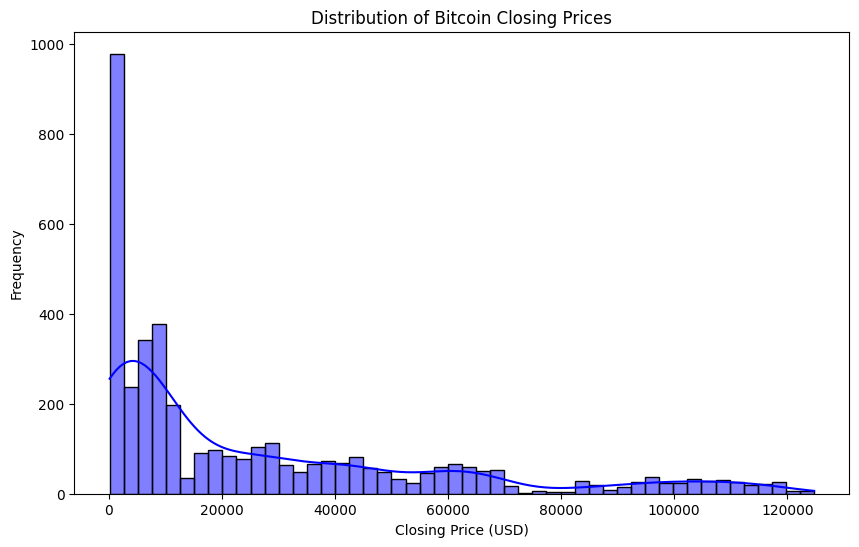

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(bitcoin_data['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency data')
plt.show()

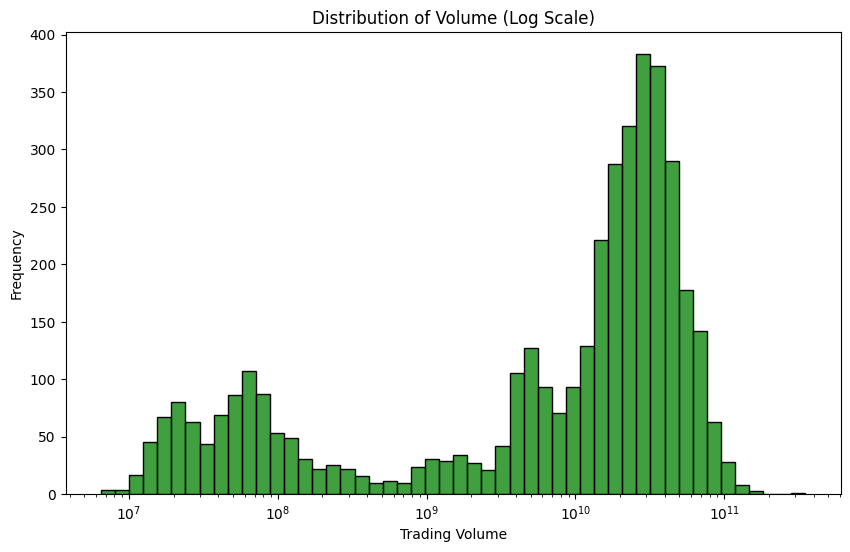

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(bitcoin_data['Volume'], bins=50, color='green', log_scale=True)
plt.title('Distribution of Volume (Log Scale)')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()

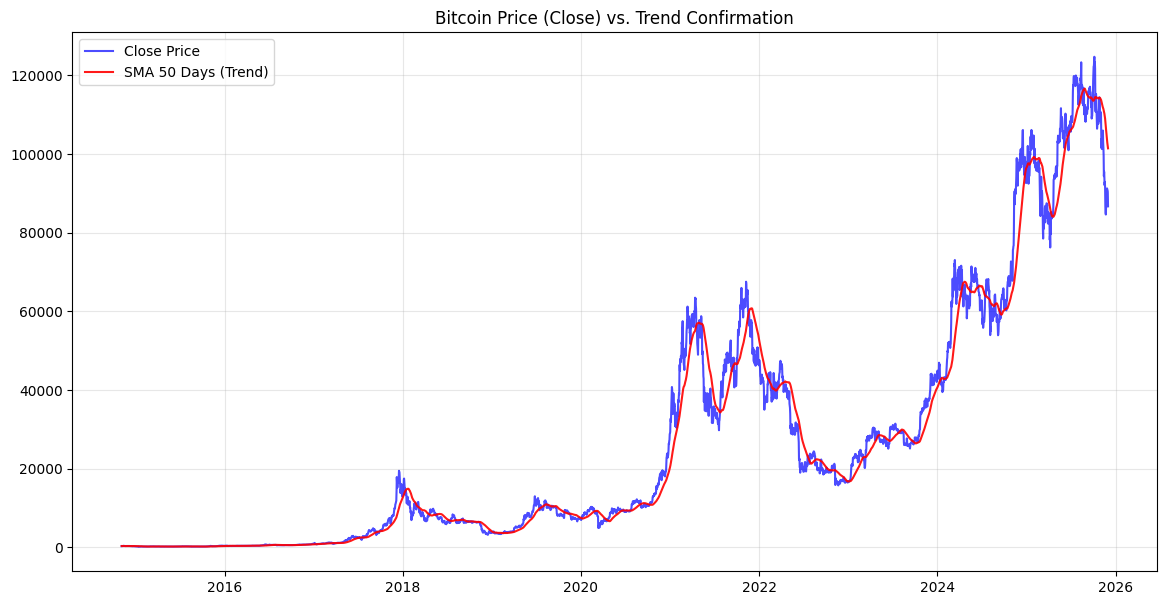

In [80]:
plt.figure(figsize=(14, 7))
plt.plot(bitcoin_data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(bitcoin_data['SMA_50'], label='SMA 50 Days (Trend)', color='red', alpha=0.9)
plt.title('Bitcoin Price (Close) vs. Trend Confirmation')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

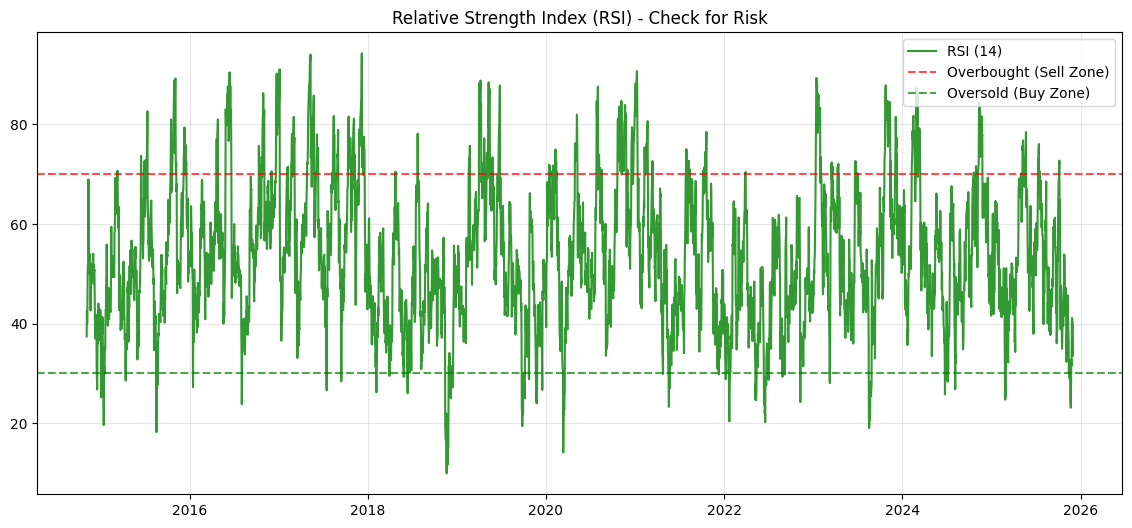

In [81]:
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data['RSI'], label='RSI (14)', color='green', alpha=0.8)
plt.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (Sell Zone)')
plt.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (Buy Zone)')
plt.title('Relative Strength Index (RSI) - Check for Risk')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

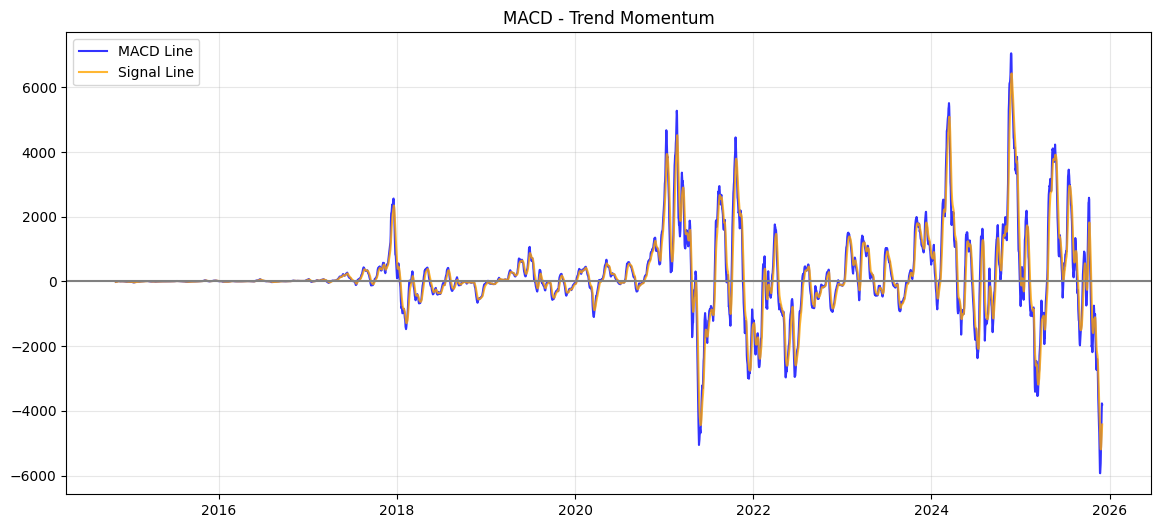

In [82]:
plt.figure(figsize=(14, 6))
plt.plot(bitcoin_data['MACD_12_26_9'], label='MACD Line', color='blue', alpha=0.8)
plt.plot(bitcoin_data['MACDs_12_26_9'], label='Signal Line', color='orange', alpha=0.8)
plt.axhline(0, color='gray', linestyle='-')
plt.title('MACD - Trend Momentum')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

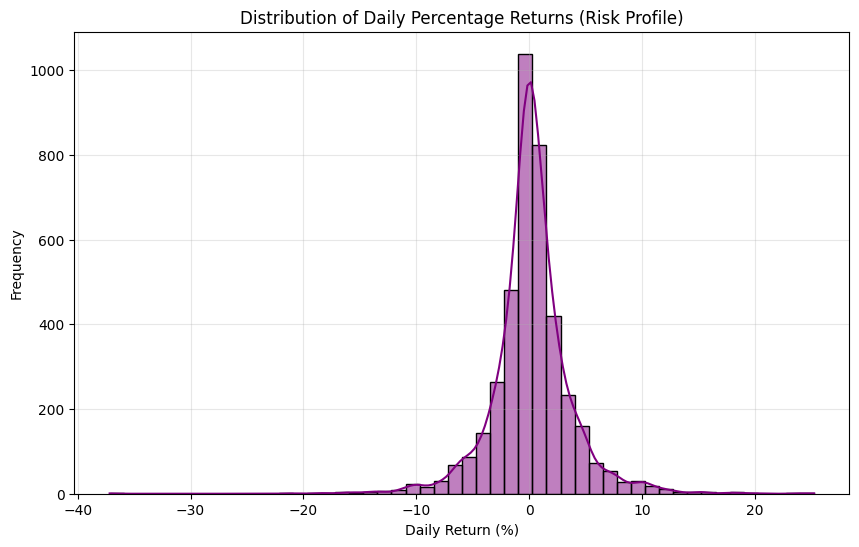

In [83]:
bitcoin_data['Daily_Return'] = bitcoin_data['Close'].pct_change() * 100
plt.figure(figsize=(10, 6))
sns.histplot(bitcoin_data['Daily_Return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Percentage Returns (Risk Profile)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

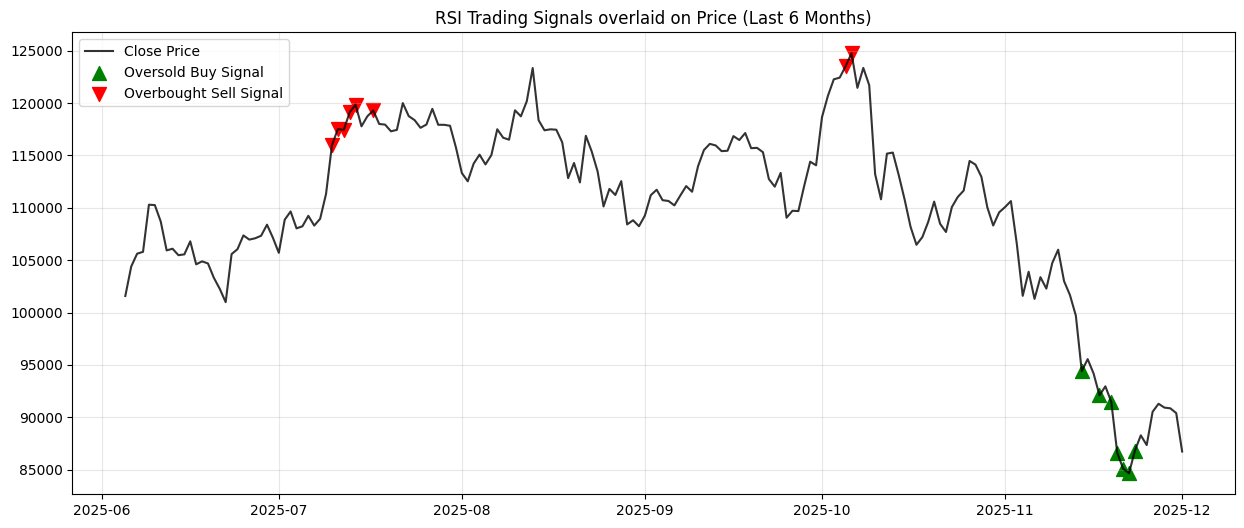

In [84]:
plot_data = bitcoin_data.iloc[-180:].copy()
plt.figure(figsize=(15, 6))
plt.plot(plot_data['Close'], label='Close Price', color='black', alpha=0.8)
buy_signals = plot_data[plot_data['RSI'] < 30]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', s=100, label='Oversold Buy Signal')
sell_signals = plot_data[plot_data['RSI'] > 70]
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', s=100, label='Overbought Sell Signal')
plt.title('RSI Trading Signals overlaid on Price (Last 6 Months)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()